Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)Plot bar charts showing impact of employee salaries on retentionPlot bar charts showing corelation between department and employee retentionNow build logistic regression model using variables that were narrowed down in step 1Measure the accuracy of the model

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [72]:
data=pd.read_csv('HR_comma_sep.csv')

In [73]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [76]:
print(data.Department.value_counts())

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


In [77]:
department_mapping = {
    'sales': 1,
    'technical': 2,
    'support': 3,
    'IT': 4,
    'product_mng': 5,
    'marketing': 6,
    'RandD': 7,
    'accounting': 8,
    'hr': 9,
    'management': 10
}
data['Department'] = data['Department'].map(department_mapping)

print(data)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [78]:
print(data.salary.value_counts())

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


In [79]:
salary_mapping = {
    'low': 1,
    'medium': 2,
    'high': 3
}
data['salary'] = data['salary'].map(salary_mapping)

In [80]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  int64  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [82]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,3.695513,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.754845,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,6.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,10.000000,3.000000


In [83]:
data['left'].describe()

count    14999.000000
mean         0.238083
std          0.425924
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: left, dtype: float64

In [84]:
print("No of employees lost by the company: ", data[data['left']==1].shape[0])
print("No of employees retained by the company: ", data[data['left']==0].shape[0])

No of employees lost by the company:  3571
No of employees retained by the company:  11428


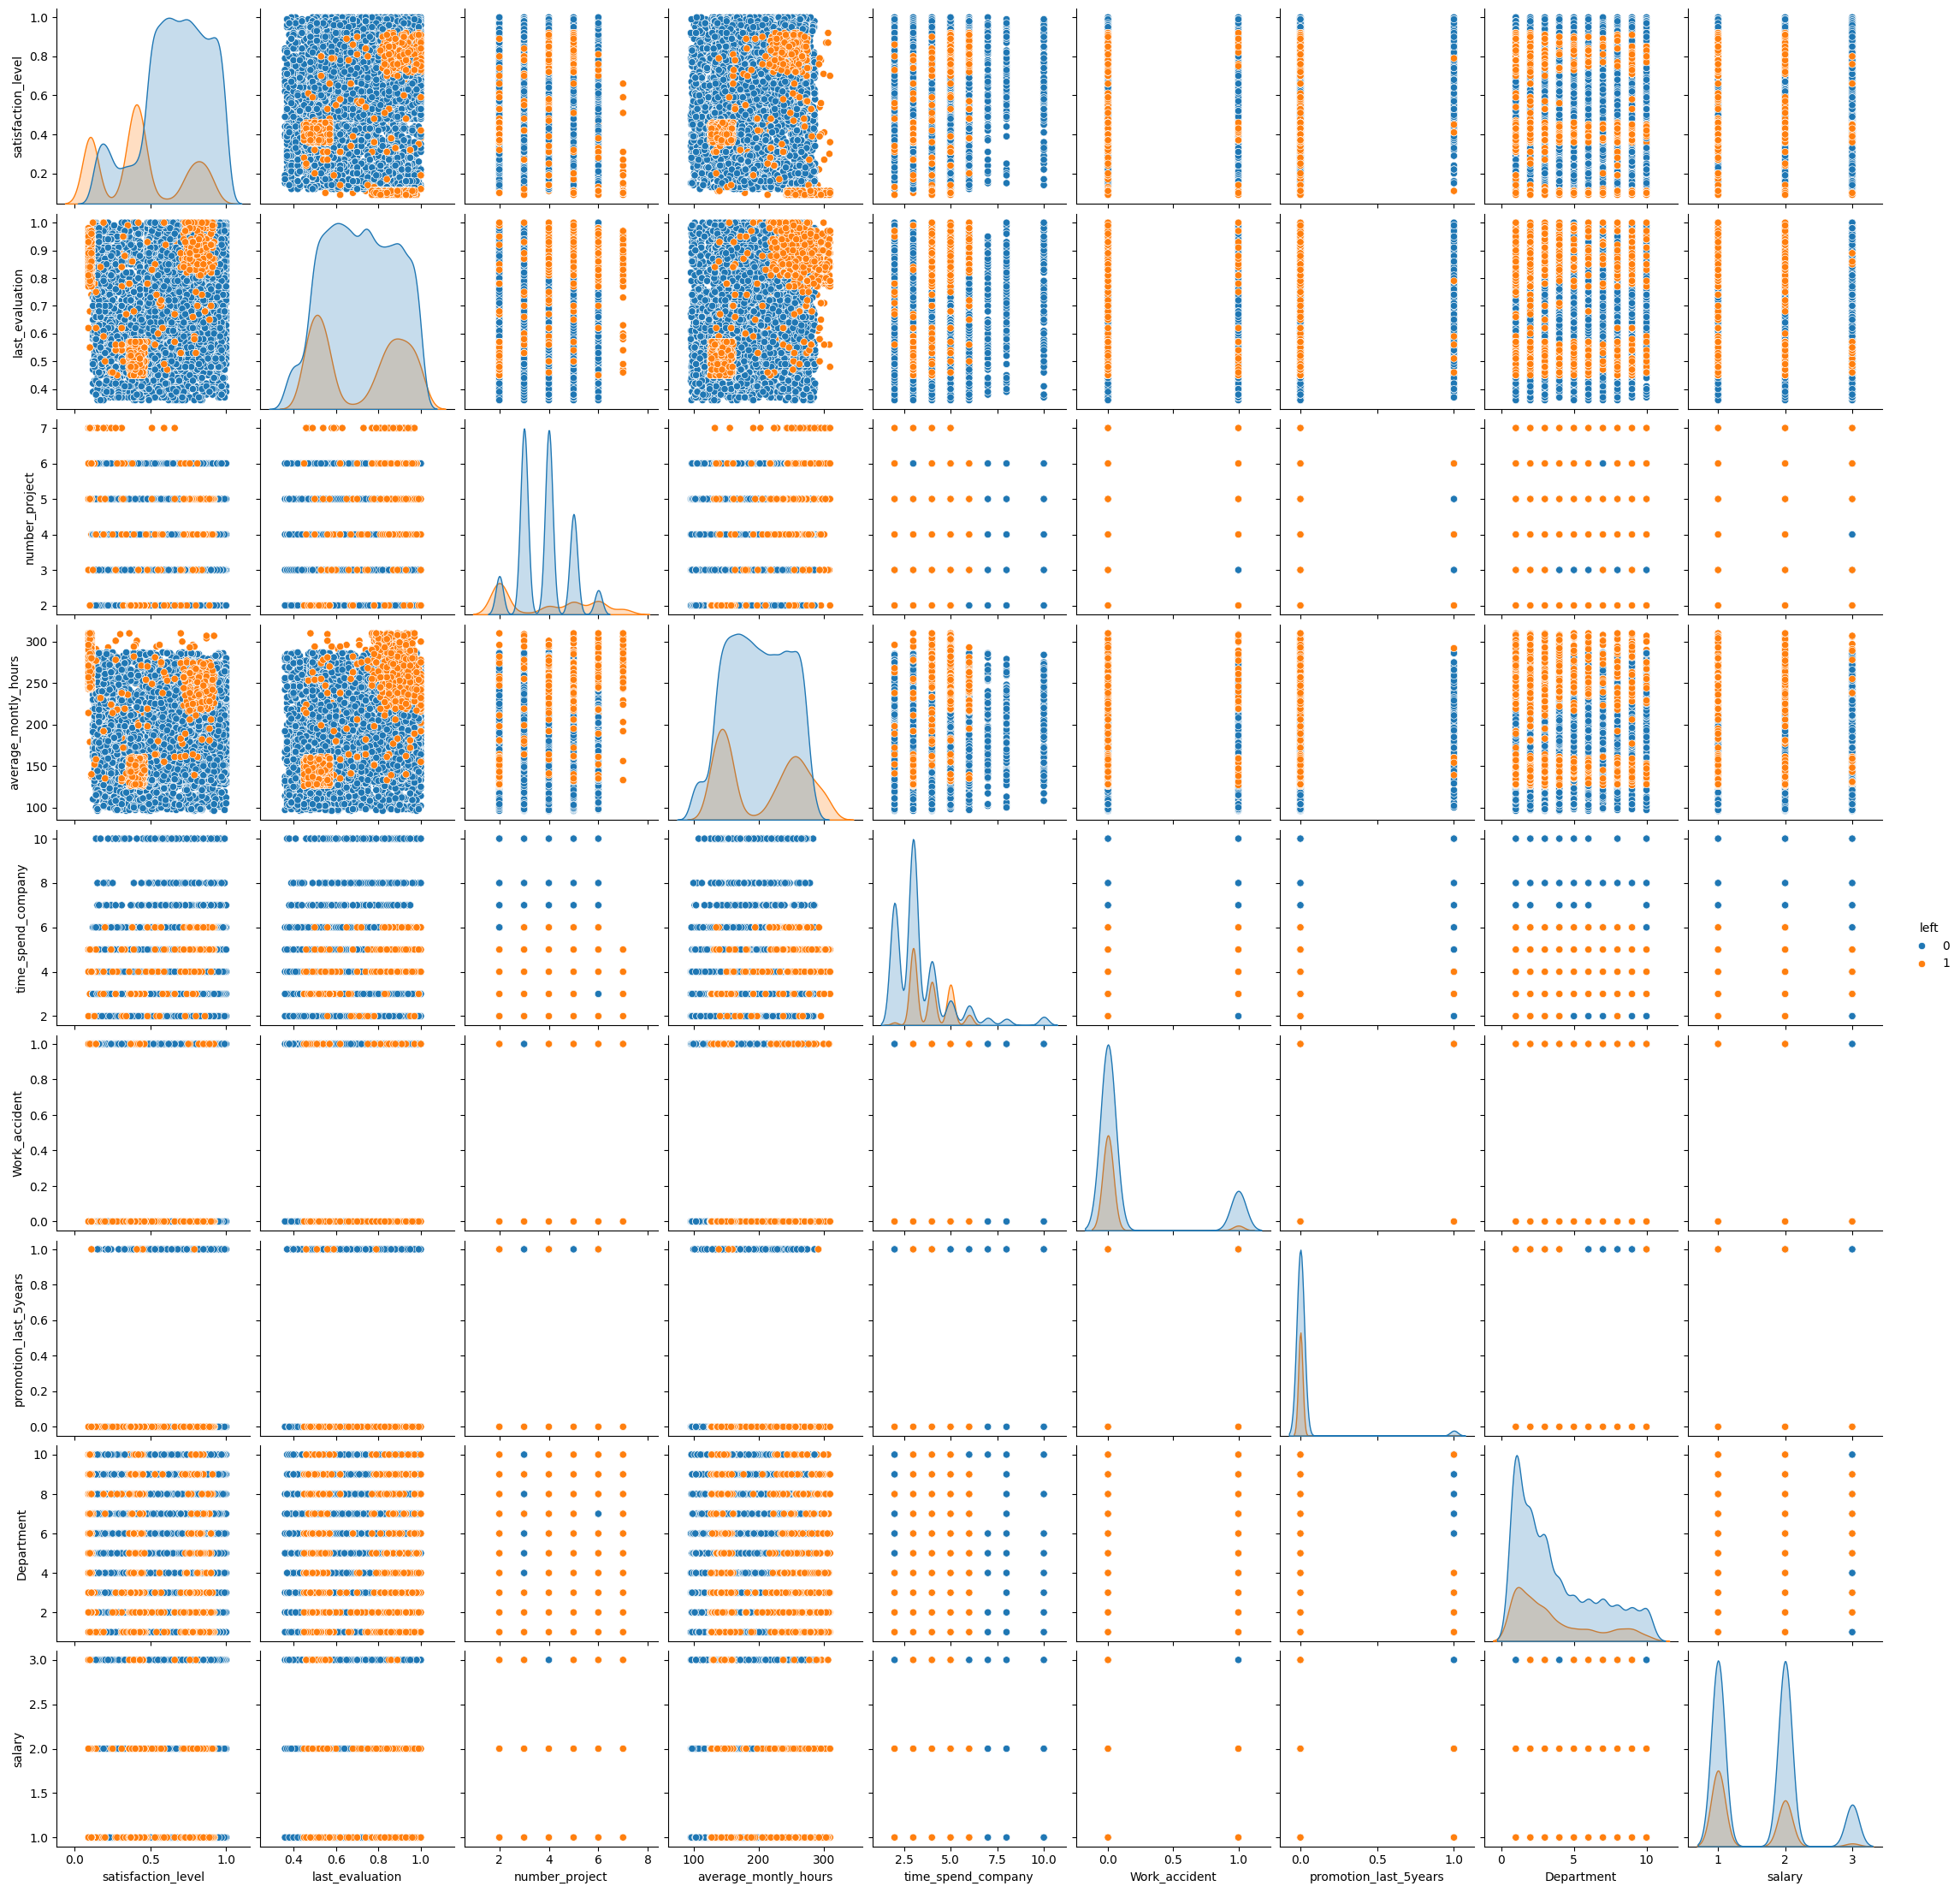

In [85]:
sns.pairplot(data, hue="left")

In [87]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

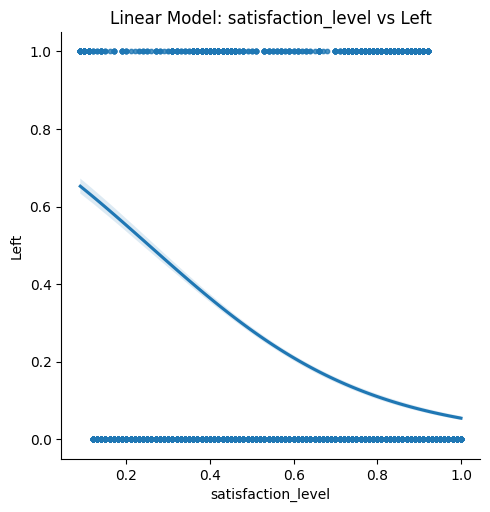

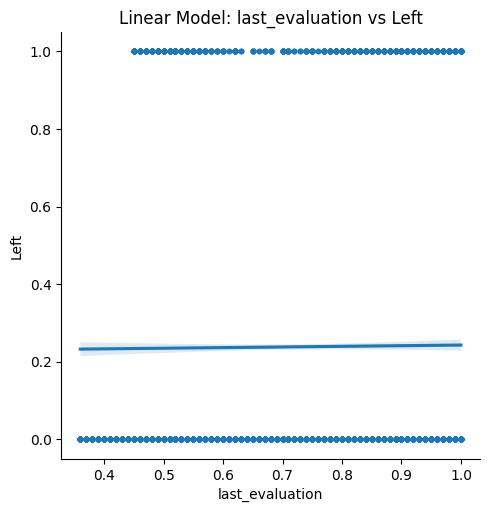

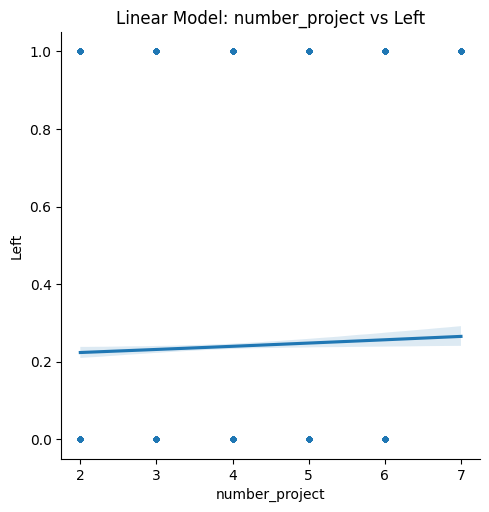

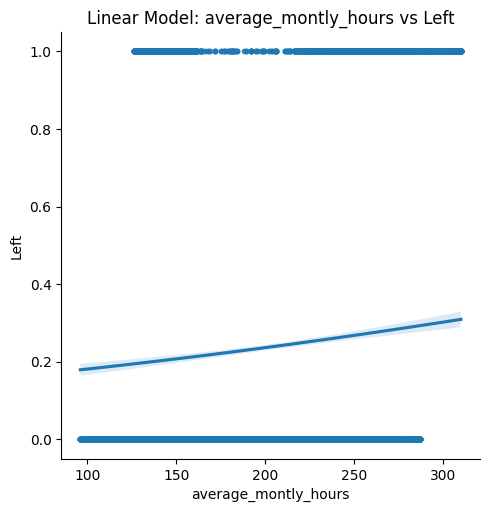

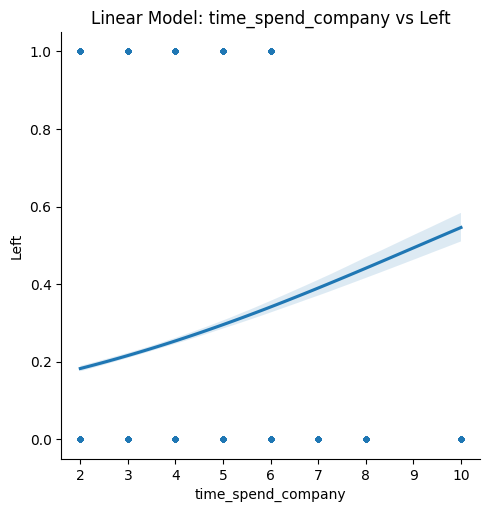

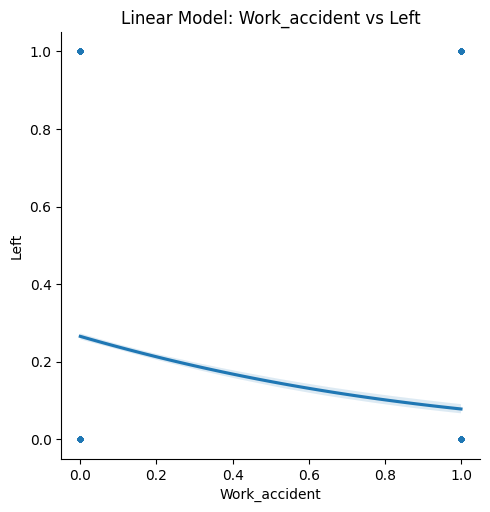

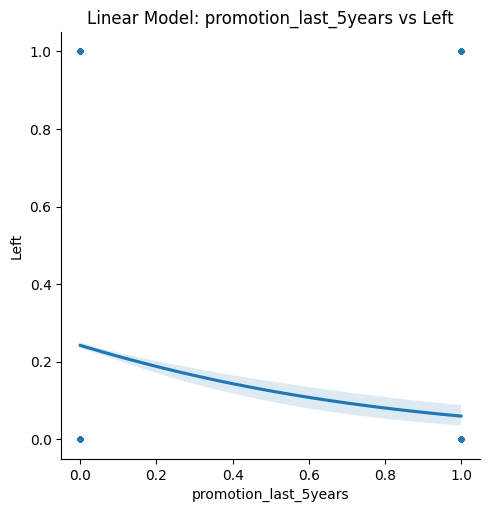

In [88]:
columns = ['satisfaction_level', 'last_evaluation', 'number_project',
           'average_montly_hours', 'time_spend_company', 'Work_accident',
           'promotion_last_5years']
for column in columns:
    sns.lmplot(x=column, y='left', data=data, logistic=True, scatter_kws={"s": 10})
    plt.title(f'Linear Model: {column} vs Left')
    plt.xlabel(column)
    plt.ylabel('Left')
    plt.show()


In [89]:
data1 = data[['left','salary']]
left = data1[data['left']==1].salary.value_counts()
retained = data1[data['left']==0].salary.value_counts()
left_percent = left / (left + retained)
retain_percent = retained / (left + retained)
counts1 = {"retained":retained, "left":left, "retained_percent":retain_percent, "left_percent":left_percent}
counts1 = pd.DataFrame(counts1)
counts1

,retained,left,retained_percent,left_percent
salary,,,,
1,5144,2172,0.703116,0.296884
2,5129,1317,0.795687,0.204313
3,1155,82,0.933711,0.066289


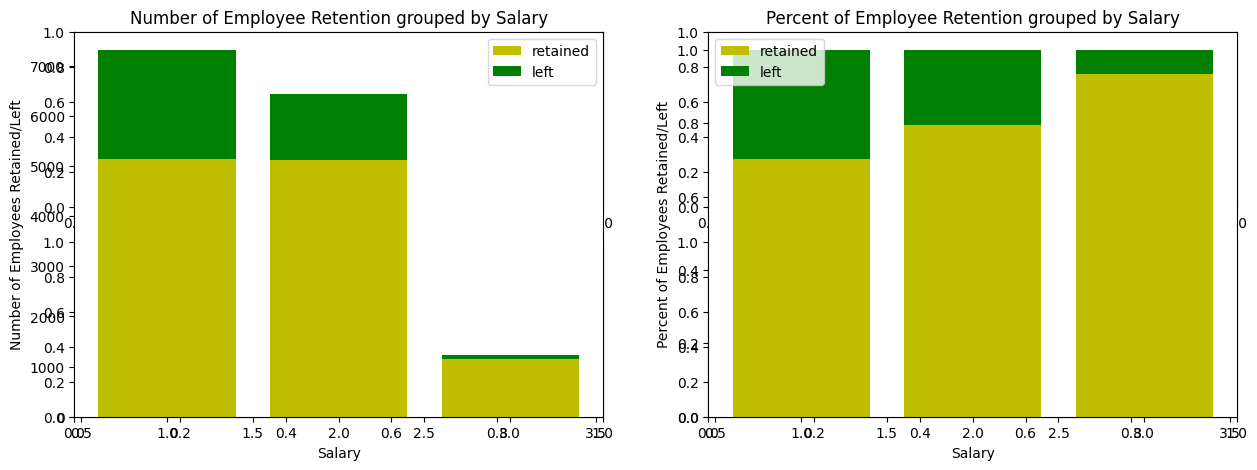

In [90]:
x = counts1.index
y1 = counts1.retained
y2 = counts1.left

f, axs = plt.subplots(2,2,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(x, y1, color='y')
plt.bar(x, y2, bottom=y1, color='g')
plt.title("Number of Employee Retention grouped by Salary")
plt.xlabel("Salary")
plt.ylabel("Number of Employees Retained/Left")
plt.legend(['retained', 'left'])
y1 = counts1.retained_percent
y2 = counts1.left_percent

plt.subplot(1, 2, 2)
plt.bar(x, y1, color='y')
plt.bar(x, y2, bottom=y1, color='g')
plt.title("Percent of Employee Retention grouped by Salary")
plt.xlabel("Salary")
plt.ylabel("Percent of Employees Retained/Left")
plt.legend(['retained', 'left'])

plt.show()

In [91]:
data1 = data[['left','Department']]
left = data1[data['left']==1].Department.value_counts()
retained = data1[data['left']==0].Department.value_counts()
left_percent = left / (left + retained)
retain_percent = retained / (left + retained)
counts2 = {"retained":retained, "left":left, "retained_percent":retain_percent, "left_percent":left_percent}
counts2 = pd.DataFrame(counts2)
counts2


,retained,left,retained_percent,left_percent
Department,,,,
1,3126,1014,0.755072,0.244928
2,2023,697,0.743750,0.256250
3,1674,555,0.751009,0.248991
4,954,273,0.777506,0.222494
5,704,198,0.780488,0.219512
6,655,203,0.763403,0.236597
7,666,121,0.846252,0.153748
8,563,204,0.734029,0.265971
9,524,215,0.709066,0.290934


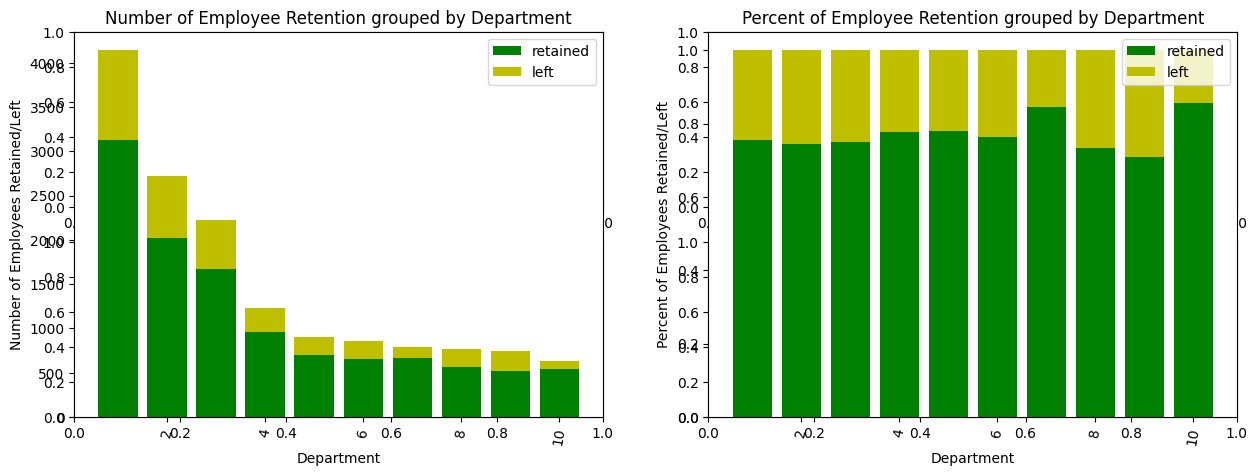

In [92]:
x = counts2.index
y1 = counts2.retained
y2 = counts2.left

f, axs = plt.subplots(2,2,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='y')
plt.title("Number of Employee Retention grouped by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees Retained/Left")
plt.xticks(rotation=80)
plt.legend(['retained', 'left'])

y1 = counts2.retained_percent
y2 = counts2.left_percent

plt.subplot(1, 2, 2)
plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='y')
plt.title("Percent of Employee Retention grouped by Department")
plt.xlabel("Department")
plt.ylabel("Percent of Employees Retained/Left")
plt.xticks(rotation=80)
plt.legend(['retained', 'left'])

plt.show()

In [93]:
data1 = data[['left','Work_accident']]
left = data1[data['left']==1].Work_accident.value_counts()
retained = data1[data['left']==0].Work_accident.value_counts()
left_percent = left / (left + retained)
retain_percent = retained / (left + retained)
counts3 = {"retained":retained, "left":left, "retained_percent":retain_percent, "left_percent":left_percent}
counts3 = pd.DataFrame(counts3)
counts3.index = ["No", "Yes"]
counts3

,retained,left,retained_percent,left_percent
No,9428,3402,0.734840,0.265160
Yes,2000,169,0.922084,0.077916


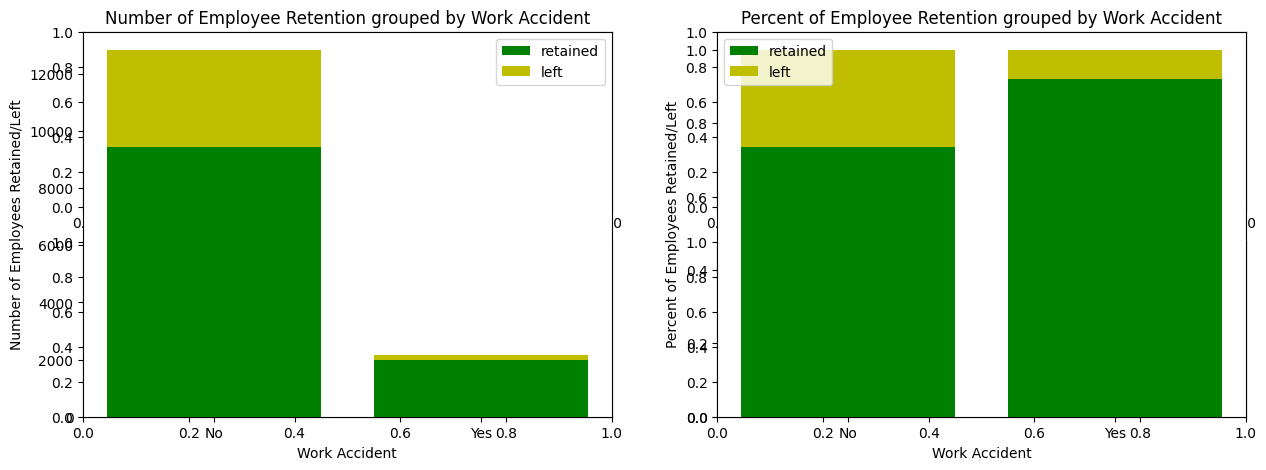

In [94]:
x = counts3.index
y1 = counts3.retained
y2 = counts3.left

f, axs = plt.subplots(2,2,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='y')
plt.title("Number of Employee Retention grouped by Work Accident")
plt.xlabel("Work Accident")
plt.ylabel("Number of Employees Retained/Left")
plt.legend(['retained', 'left'])

y1 = counts3.retained_percent
y2 = counts3.left_percent

plt.subplot(1, 2, 2)
plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='y')
plt.title("Percent of Employee Retention grouped by Work Accident")
plt.xlabel("Work Accident")
plt.ylabel("Percent of Employees Retained/Left")
plt.legend(['retained', 'left'])

plt.show()


In [95]:
data1 = data[['left','promotion_last_5years']]
left = data1[data['left']==1].promotion_last_5years.value_counts()
retained = data1[data['left']==0].promotion_last_5years.value_counts()
left_percent = left / (left + retained)
retain_percent = retained / (left + retained)
counts4 = {"retained":retained, "left":left, "retained_percent":retain_percent, "left_percent":left_percent}
counts4 = pd.DataFrame(counts4)
counts4.index = ["No", "Yes"]
counts4

,retained,left,retained_percent,left_percent
No,11128,3552,0.758038,0.241962
Yes,300,19,0.940439,0.059561


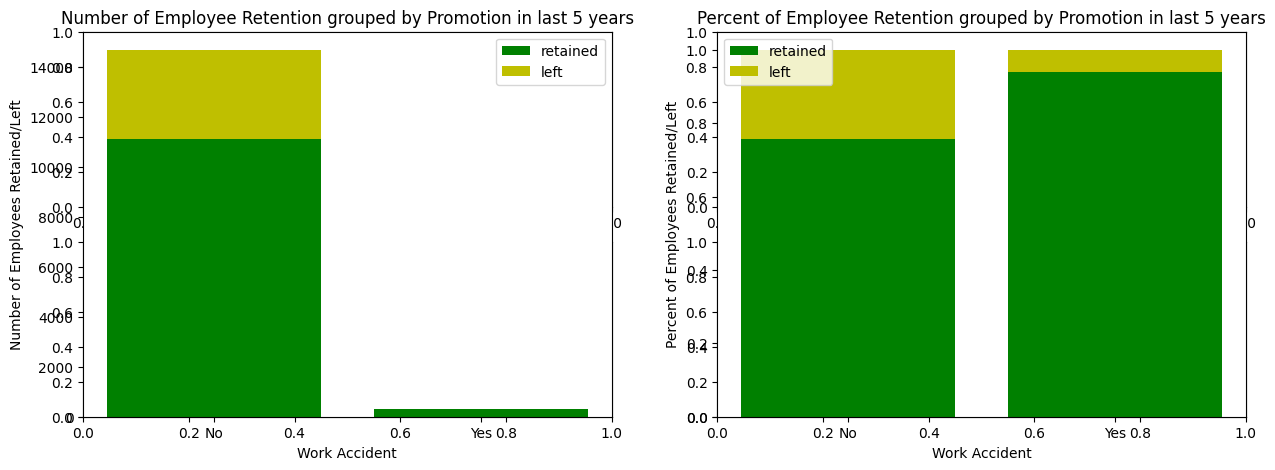

In [96]:
x = counts4.index
y1 = counts4.retained
y2 = counts4.left

f, axs = plt.subplots(2,2,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='y')
plt.title("Number of Employee Retention grouped by Promotion in last 5 years")
plt.xlabel("Work Accident")
plt.ylabel("Number of Employees Retained/Left")
plt.legend(['retained', 'left'])

y1 = counts4.retained_percent
y2 = counts4.left_percent

plt.subplot(1, 2, 2)
plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='y')
plt.title("Percent of Employee Retention grouped by Promotion in last 5 years")
plt.xlabel("Work Accident")
plt.ylabel("Percent of Employees Retained/Left")
plt.legend(['retained', 'left'])

plt.show()

In [99]:
print(data)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [308]:
X = data[['satisfaction_level', 'last_evaluation', 'number_project',
          'Work_accident',
        'promotion_last_5years', 'salary']]
y = data['left'] 

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)


In [320]:
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

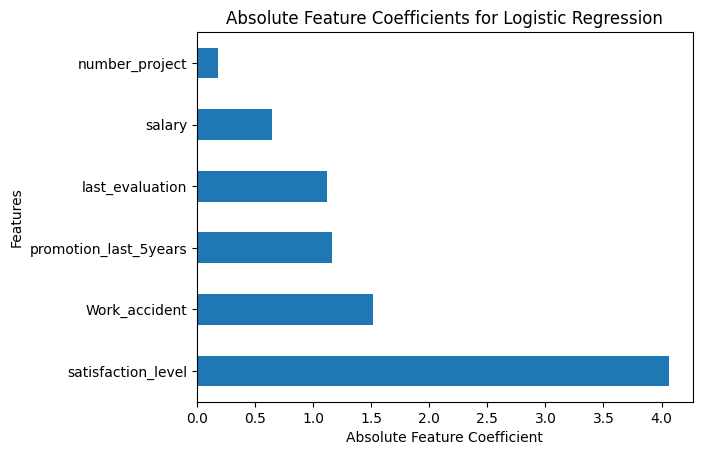

In [321]:
coefficients = model.coef_[0]
feat_importances = pd.Series(coefficients, index=X.columns)
feat_importances_abs = feat_importances.abs() 
feat_importances_abs.nlargest(10).plot(kind='barh')
plt.xlabel('Absolute Feature Coefficient')
plt.ylabel('Features')
plt.title('Absolute Feature Coefficients for Logistic Regression')
plt.show()

In [322]:

y_pred = model.predict(X_test)

In [323]:
from sklearn.metrics import classification_report, confusion_matrix


print(" accuracy = ", accuracy_score(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

 accuracy =  0.813
[[2136  134]
 [ 427  303]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2270
           1       0.69      0.42      0.52       730

    accuracy                           0.81      3000
   macro avg       0.76      0.68      0.70      3000
weighted avg       0.80      0.81      0.80      3000

